In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso

In [38]:
df = pd.read_csv("Fertilizer_Prediction.csv")
df

,Soil_Type,Crop_Type,N,P,K,Fertilizer
0,Sandy,Maize,37,0,0,Urea
1,Loamy,Sugarcane,12,36,23,SSP
2,Black,Cotton,7,30,9,Urea-SSP-MOP
3,Red,Tobacco,22,20,0,28-28
4,Clayey,rice,35,0,0,Urea
...,...,...,...,...,...,...
206,Black,Millets,60,50,40,DAP-Urea
207,Loamy,Wheat,39,50,60,Urea-DAP-MOP
208,Red,Cucumber,41,75,50,SSP-MOP
209,Loamy,Sugarcane,12,36,23,SSP


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Soil_Type   211 non-null    object
 1   Crop_Type   211 non-null    object
 2   N           211 non-null    int64 
 3   P           211 non-null    int64 
 4   K           211 non-null    int64 
 5   Fertilizer  211 non-null    object
dtypes: int64(3), object(3)
memory usage: 10.0+ KB


In [40]:
df.isna().sum()

Soil_Type     0
Crop_Type     0
N             0
P             0
K             0
Fertilizer    0
dtype: int64

In [41]:
df.describe()

,N,P,K
count,211.000000,211.000000,211.000000
mean,20.767773,22.175355,9.341232
std,14.081670,17.267987,15.934603
min,0.000000,0.000000,0.000000
25%,10.000000,10.500000,0.000000
50%,14.000000,20.000000,0.000000
75%,35.000000,35.000000,13.000000
max,60.000000,100.000000,90.000000


In [42]:
df['Fertilizer'].unique()

array(['Urea', 'SSP', 'Urea-SSP-MOP', '28-28', '17-17-17', 'SSP-DAP',
       '14-35-14', 'DAP', 'DAP-MOP', 'SSP-Urea', 'MOP', '20-20',
       'Urea-DAP', 'SSP-DAP-Urea', 'MOP-SSP', 'MOP-Urea', '10-26-26',
       'Urea-SSP', 'DAP-SSP', 'SSP-MOP', 'Urea-DAP-MOP', 'DAP-Urea'],
      dtype=object)

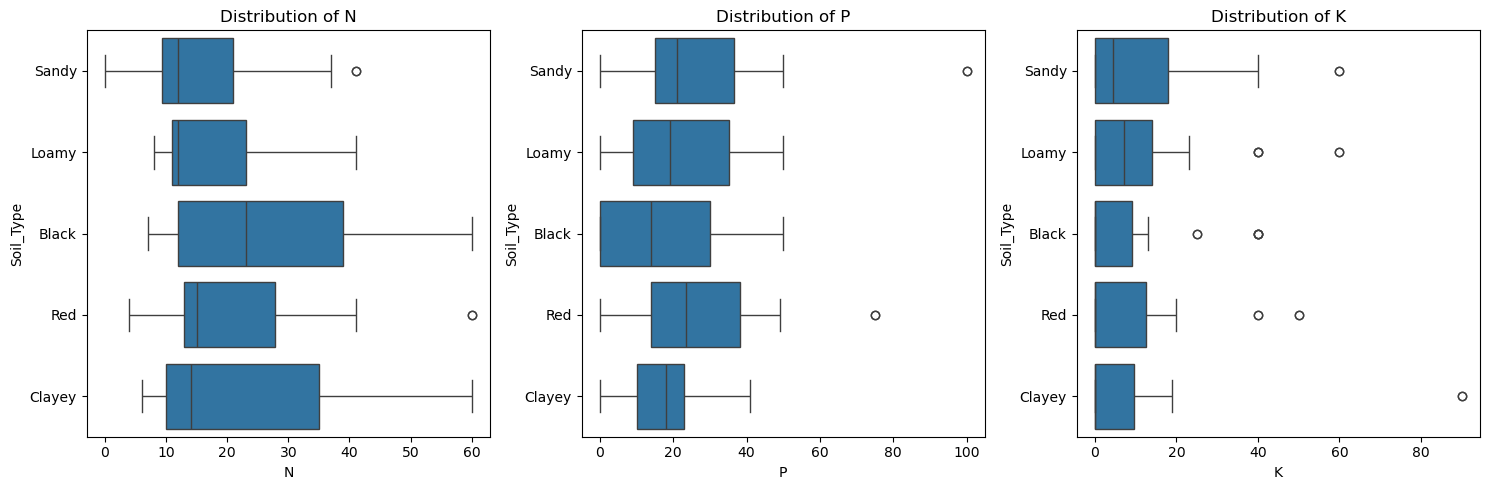

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(y='Soil_Type', x='N', data=df, ax=axes[0])
axes[0].set_title('Distribution of N')

sns.boxplot(y='Soil_Type', x='P', data=df, ax=axes[1])
axes[1].set_title('Distribution of P')

sns.boxplot(y='Soil_Type', x='K', data=df, ax=axes[2])
axes[2].set_title('Distribution of K')

plt.tight_layout()
plt.show()






In [44]:
le = LabelEncoder()
df['Fertilizer'] = le.fit_transform(df['Fertilizer'])
df

,Soil_Type,Crop_Type,N,P,K,Fertilizer
0,Sandy,Maize,37,0,0,17
1,Loamy,Sugarcane,12,36,23,12
2,Black,Cotton,7,30,9,21
3,Red,Tobacco,22,20,0,4
4,Clayey,rice,35,0,0,17
...,...,...,...,...,...,...
206,Black,Millets,60,50,40,8
207,Loamy,Wheat,39,50,60,19
208,Red,Cucumber,41,75,50,15
209,Loamy,Sugarcane,12,36,23,12


In [45]:
class_Fertilizer = df['Fertilizer'].unique().tolist()
class_Fertilizer = le.classes_
class_Fertilizer

array(['10-26-26', '14-35-14', '17-17-17', '20-20', '28-28', 'DAP',
       'DAP-MOP', 'DAP-SSP', 'DAP-Urea', 'MOP', 'MOP-SSP', 'MOP-Urea',
       'SSP', 'SSP-DAP', 'SSP-DAP-Urea', 'SSP-MOP', 'SSP-Urea', 'Urea',
       'Urea-DAP', 'Urea-DAP-MOP', 'Urea-SSP', 'Urea-SSP-MOP'],
      dtype=object)

In [46]:
Fertilizer_dict = {}
for index,Fertilizer in enumerate(class_Fertilizer):
    Fertilizer_dict[Fertilizer] = index
    
print(Fertilizer_dict)

{'10-26-26': 0, '14-35-14': 1, '17-17-17': 2, '20-20': 3, '28-28': 4, 'DAP': 5, 'DAP-MOP': 6, 'DAP-SSP': 7, 'DAP-Urea': 8, 'MOP': 9, 'MOP-SSP': 10, 'MOP-Urea': 11, 'SSP': 12, 'SSP-DAP': 13, 'SSP-DAP-Urea': 14, 'SSP-MOP': 15, 'SSP-Urea': 16, 'Urea': 17, 'Urea-DAP': 18, 'Urea-DAP-MOP': 19, 'Urea-SSP': 20, 'Urea-SSP-MOP': 21}


In [47]:
le = LabelEncoder()
df['Crop_Type'] = le.fit_transform(df['Crop_Type'])
df

,Soil_Type,Crop_Type,N,P,K,Fertilizer
0,Sandy,3,37,0,0,17
1,Loamy,7,12,36,23,12
2,Black,1,7,30,9,21
3,Red,8,22,20,0,4
4,Clayey,10,35,0,0,17
...,...,...,...,...,...,...
206,Black,4,60,50,40,8
207,Loamy,9,39,50,60,19
208,Red,2,41,75,50,15
209,Loamy,7,12,36,23,12


In [48]:
class_Crop_Type = df['Crop_Type'].unique().tolist()
class_Crop_Type = le.classes_
class_Crop_Type

array(['Barley', 'Cotton', 'Cucumber', 'Maize', 'Millets', 'Oil seeds',
       'Paddy', 'Sugarcane', 'Tobacco', 'Wheat', 'rice', 'tomatoes'],
      dtype=object)

In [49]:
Crop_Type_dict = {}
for index, Crop_Type in enumerate(class_Crop_Type):
    Crop_Type_dict[Crop_Type] = index
print(Crop_Type_dict)

{'Barley': 0, 'Cotton': 1, 'Cucumber': 2, 'Maize': 3, 'Millets': 4, 'Oil seeds': 5, 'Paddy': 6, 'Sugarcane': 7, 'Tobacco': 8, 'Wheat': 9, 'rice': 10, 'tomatoes': 11}


In [50]:
le = LabelEncoder()
df['Soil_Type'] = le.fit_transform(df['Soil_Type'])
df

,Soil_Type,Crop_Type,N,P,K,Fertilizer
0,4,3,37,0,0,17
1,2,7,12,36,23,12
2,0,1,7,30,9,21
3,3,8,22,20,0,4
4,1,10,35,0,0,17
...,...,...,...,...,...,...
206,0,4,60,50,40,8
207,2,9,39,50,60,19
208,3,2,41,75,50,15
209,2,7,12,36,23,12


In [51]:
class_Soil_Type = df['Soil_Type'].unique().tolist()
class_Soil_Type = le.classes_
class_Soil_Type

array(['Black', 'Clayey', 'Loamy', 'Red', 'Sandy'], dtype=object)

In [52]:
Soil_Type_dict = {}
for index, Soil_Type in enumerate(class_Soil_Type):
   Soil_Type_dict[Soil_Type] = index
print(Soil_Type_dict)

{'Black': 0, 'Clayey': 1, 'Loamy': 2, 'Red': 3, 'Sandy': 4}


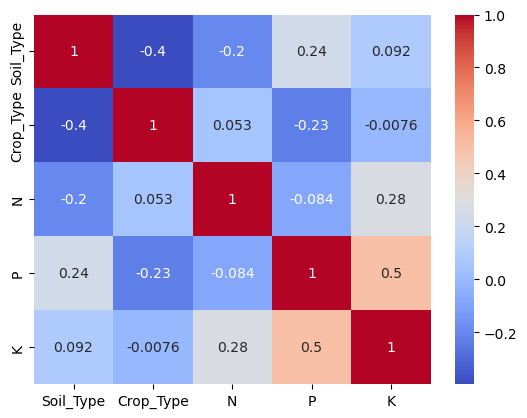

In [53]:
X = df[['Soil_Type', 'Crop_Type', 'N', 'P', 'K']]  
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show()


C:\Users\Win 10\AppData\Local\Temp\ipykernel_6440\3666723771.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Scaled_Coefficient', data=coef_df, palette='viridis')


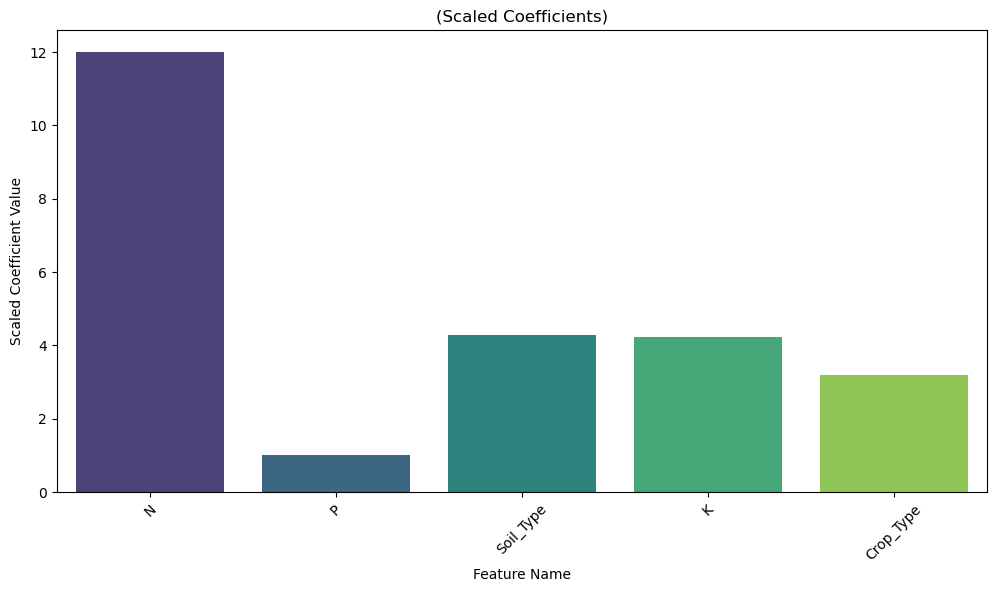

In [54]:


X = df.drop(columns=['Fertilizer'])
y = df['Fertilizer']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)


coefficients = lasso.coef_
feature_names = X.columns


coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})


coef_df = coef_df[coef_df['Coefficient'] != 0]


coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)


coef_df = coef_df.head(12)


scaler = MinMaxScaler(feature_range=(1, 12))
coef_df['Scaled_Coefficient'] = scaler.fit_transform(coef_df[['Coefficient']])


plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Scaled_Coefficient', data=coef_df, palette='viridis')
plt.title('(Scaled Coefficients)')
plt.xlabel('Feature Name')
plt.ylabel('Scaled Coefficient Value')
plt.xticks(rotation=45)  
plt.show()


In [55]:
acc = []
model_names = []

In [56]:
x = df.drop('Fertilizer',axis=1)
y = df['Fertilizer']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,shuffle=True ,random_state=42)

In [57]:
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)
rf_model.score(x_train,y_train),rf_model.score(x_test,y_test)

(1.0, 0.96875)

In [58]:

accs = accuracy_score(y_pred, y_test)
acc.append(accs)
model_names.append('rf_model')
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
print('.:. Random Forest Classifier:'+'\033[1m {:.3f}%'.format(accs*100)+' .:.')

Confusion Matrix:
 [[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         6
           2       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6     

D:\Newfolder\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Newfolder\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Newfolder\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [59]:
svc_model = SVC(kernel='linear', random_state=42)  
svc_model.fit(x_train, y_train)
y_pred1 = svc_model.predict(x_test)
svc_model.score(x_train,y_train),svc_model.score(x_test,y_test)

(0.9441340782122905, 0.8125)

In [60]:

accs1 = accuracy_score(y_pred1, y_test)
acc.append(accs1)
model_names.append('svc_model')
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred1))
print("Classification Report:\n",classification_report(y_test,y_pred1))
print('.:. Suuport Vector Classifier:'+'\033[1m {:.3f}%'.format(accs1*100)+' .:.')

Confusion Matrix:
 [[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       0.60      1.00      0.75         3
           5       1.00      0.33      0.50         3
           6     

D:\Newfolder\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Newfolder\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Newfolder\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [61]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)
y_pred2 = knn_model.predict(x_test)
knn_model.score(x_train,y_train),knn_model.score(x_test,y_test)

(0.7988826815642458, 0.59375)

In [62]:

accs2 = accuracy_score(y_pred2, y_test)
acc.append(accs2)
model_names.append('knn_model')
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred2))
print("Classification Report:\n",classification_report(y_test,y_pred2))
print('.:. K Neighbors Classifier:'+'\033[1m {:.3f}%'.format(accs2*100)+' .:.')

Confusion Matrix:
 [[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.86      1.00      0.92         6
           2       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
  

D:\Newfolder\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Newfolder\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Newfolder\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Newfolder\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMet

C:\Users\Win 10\AppData\Local\Temp\ipykernel_6440\4173570328.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = acc, y = model_names, palette='dark')


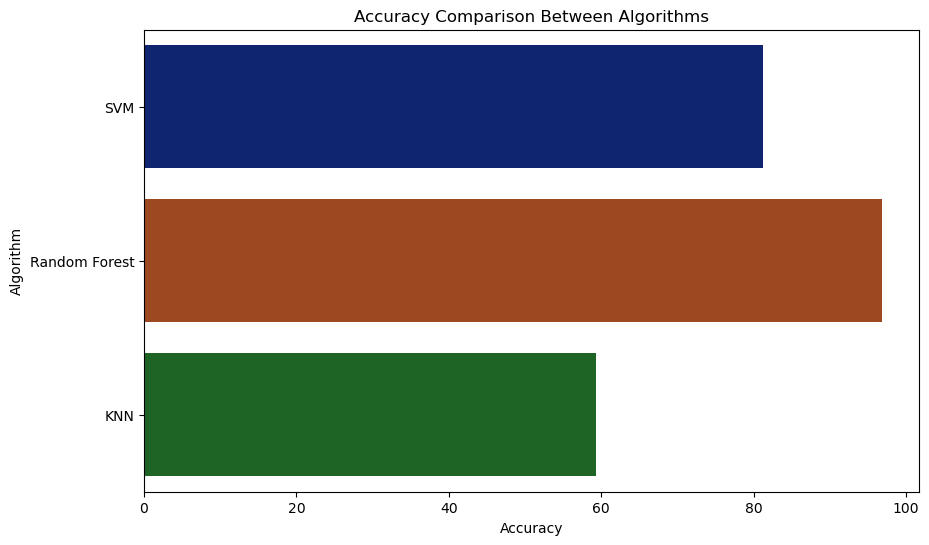

In [63]:

acc = [81.250,  96.875 ,  59.375]  
model_names = ['SVM', 'Random Forest', 'KNN']
plt.figure(figsize=[10,6], dpi=100)
plt.title('Accuracy Comparison Between Algorithms')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc, y = model_names, palette='dark')  
plt.show()


In [64]:
features = np.array([[9,3,37,5,20]])
Recommended_fertilizer = rf_model.predict(features)
print("Recommended fertilizer:",class_Fertilizer[Recommended_fertilizer])

D:\Newfolder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Recommended fertilizer: ['DAP-MOP']


In [65]:
import pickle

In [66]:
filename='Fertilizersav.sav'
pickle.dump(rf_model,open(filename,'wb'))

### 